## Supervised Machine Learning

- Supervised learning typically begins with an established set of data and a certain understanding of how that data is classified. 
- Supervised learning is intended to find patterns in data that can be applied to an analytics process. 
- This data has labeled features that define the meaning of data. 

### Machine Learningworkflow

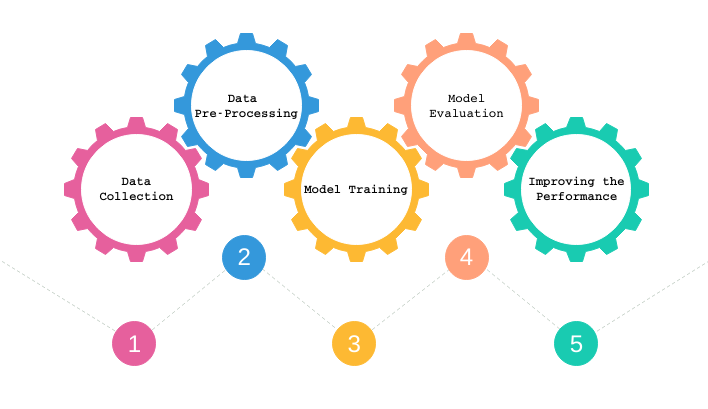

# Iris dataset Classifier
- "Hello world of ML"

- Introduction on Classification

### 1. Problem Definition and Data Collection

The first step is to ask interesting questions. What is the problem you are trying solve?



### 2. Data Understanding and Preparation

The first data preprocessing task is data cleaning. For example, filling missing values, smoothing 
noisy data, removing outliers, and resolving consistencies. This is usually followed by integration 
of multiple data sources and data transformation to a specific range (normalization), to value bins 
(discretized intervals), and to reduce the number of dimensions.


##### About Iris dataset

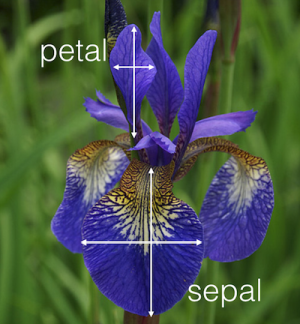

The iris dataset contains the following data:
- 50 samples of 3 different species of iris (150 samples total)
- Measurements: sepal length, sepal width, petal length, petal width
- The format for the data: (sepal length, sepal width, petal length, petal width)
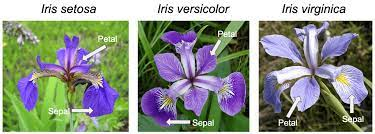

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import seaborn as sns

In [12]:
#https://scikit-learn.org/stable/datasets/toy_dataset.html
iris = datasets.load_iris()
features= iris.data
target = iris.target

In [13]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [14]:
#print feature_names and target_names
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [15]:
#load the data into a pandas dataframe using:pd.DataFrame. 
#We then print the first 5 rows of the data using: head()

iris_df= pd.DataFrame(iris.data,
                        columns=iris.feature_names)

iris_df['iris_class']=iris.target
iris_df.sample(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_class
88,5.6,3.0,4.1,1.3,1
5,5.4,3.9,1.7,0.4,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
22,4.6,3.6,1.0,0.2,0
85,6.0,3.4,4.5,1.6,1
61,5.9,3.0,4.2,1.5,1
93,5.0,2.3,3.3,1.0,1
100,6.3,3.3,6.0,2.5,2
27,5.2,3.5,1.5,0.2,0


#### Exploratory Data Analysis (EDA) 
1. EDA is a technique to analyze data using some visual Techniques. 
2. With this technique, we can get detailed information about the statistical summary of the data. 
3. We will also be able to deal with the duplicates values, outliers, and also see some trends or patterns present in the dataset.

In [16]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Understanding Data ( Data cleaning etc)
- Checking Missing Values
- Checking Duplicates: iris_df = iris_df.drop_duplicates(subset ="iris_class")
- Check if if the dataset is balanced or not: iris_df.iris_class.value_counts()
- Data Visualization
- Relation between variables


In [17]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
iris_class           0
dtype: int64

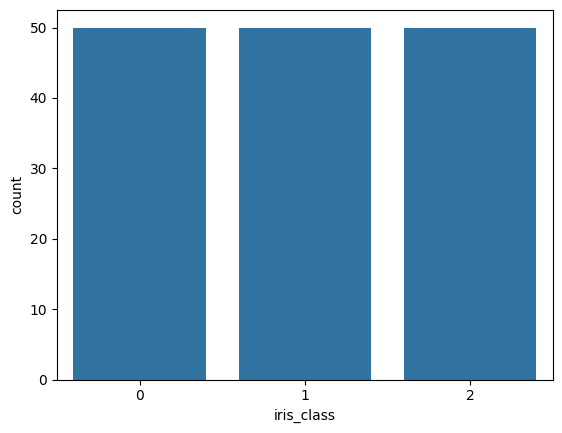

In [18]:
sns.countplot(x='iris_class', data=iris_df)
plt.show()

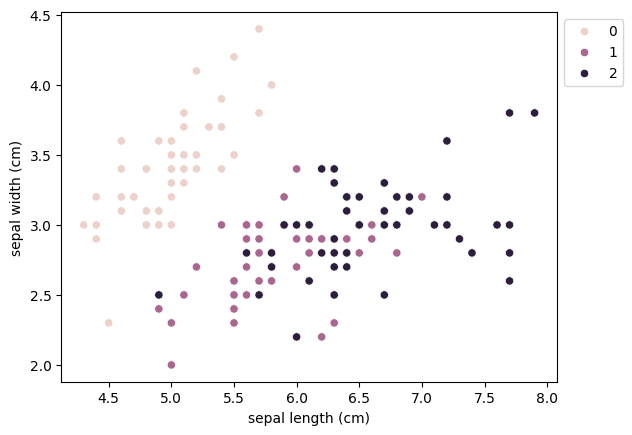

In [19]:
#sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)	iris_class
#['setosa' 'versicolor' 'virginica']
#we can infer that – 
#Species Setosa has smaller sepal lengths but larger sepal widths.
#Versicolor Species lies in the middle of the other two species in terms of sepal length and width
#Species Virginica has larger sepal lengths but smaller sepal widths.
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)',
                hue='iris_class', data=iris_df, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()


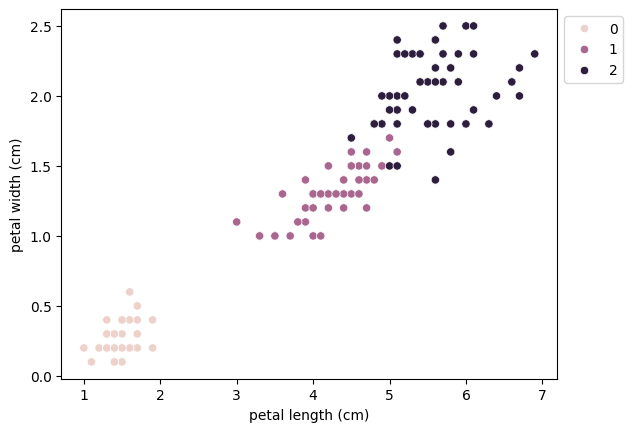

In [20]:
#Comparing Petal Length and Petal Width
# we can infer that – 
# Species Setosa has smaller petal lengths and widths.
# Versicolor Species lies in the middle of the other two species in terms of petal length and width
# Species Virginica has the largest of petal lengths and widths.

sns.scatterplot(x='petal length (cm)', y='petal width (cm)',
                hue='iris_class', data=iris_df, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

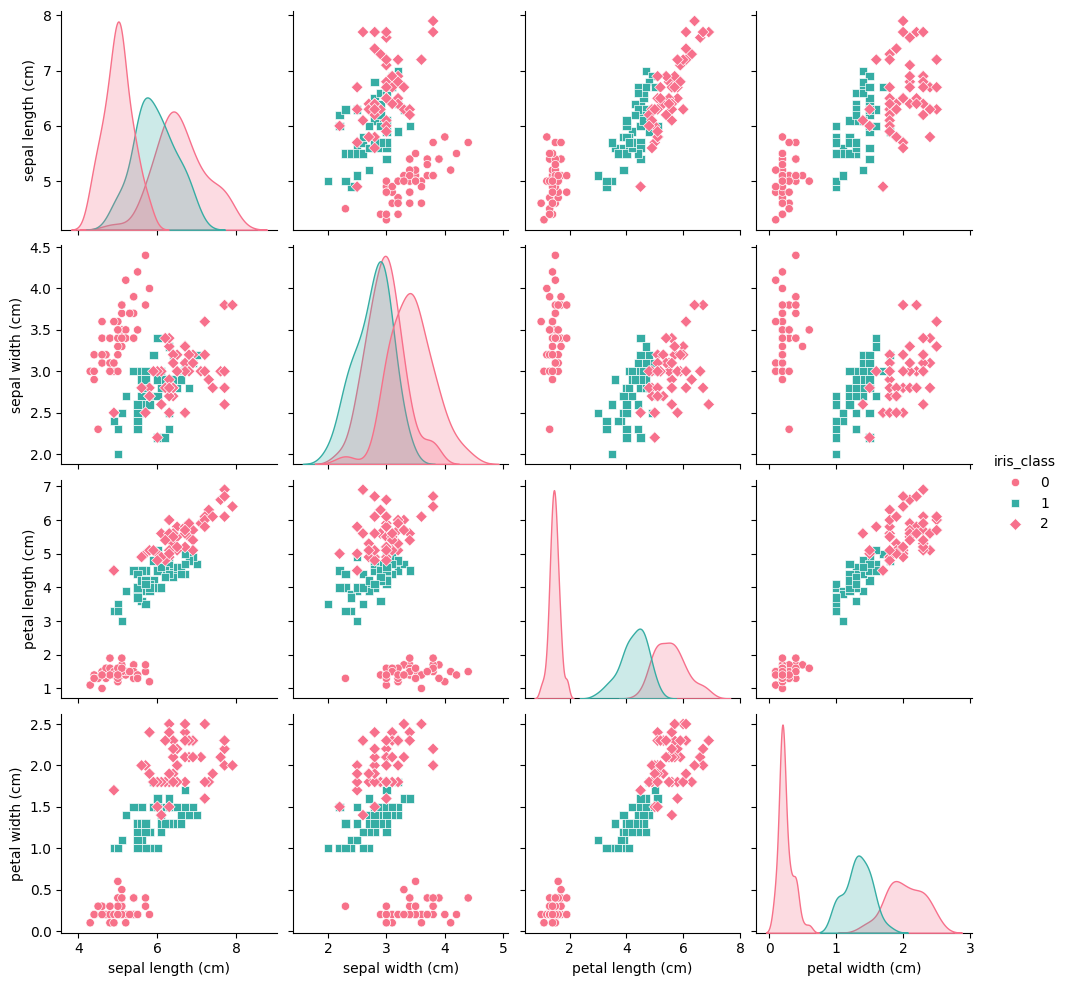

In [21]:
#plot all the column’s relationships using a pairplot. It can be used for multivariate analysis.
sns.pairplot(iris_df, hue="iris_class", palette="husl", markers=["o", "s", "D"])
plt.show()

# Split the Data Into Train and Test Datasets
- To train the model and next test the model we have to split the entire dataset into train and test sets. 
- In that, the training dataset is used to train the model and the test dataset is to test the model which has been trained with the training dataset.

In [22]:
x=iris_df.iloc[:,:4]
y=iris_df.iloc[:,4]

In [23]:
#Next step is to create a train and test split. Note the stratification parameter. 
#This is used to ensure that class distribution in training / test split remains consistent / balanced.

from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(80/20)



Perform Feature Scaling

Next step is to perform feature scaling in order to make sure features are in fixed range irrespective of their values / units etc.



In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
X_train_std = sc.transform(x_train)
X_test_std = sc.transform(x_test)

NameError: name 'x_train' is not defined

Train a Logistic Regression Model
Next step is to train a logistic regression model. The following needs to be noted while using LogisticRegression algorithm sklearn.linear_model implementation:

Usage of C parameters. Smaller values of C specify stronger regularization.
The multi_class parameter is assigned to ‘ovr‘. It represents one-vs-rest algorithm to be used. Other option is multinomial.
The solver parameter is assigned to ‘lbfsg‘. Other solvers which can be used are newton-cg, sag, saga, lib linear

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression classifier
#lr = __________(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
 
# Fit the model
#
#lr.fit(X_train_std, y_train)


In [ ]:
from sklearn import metrics,confusion_matrix
# Create the predictions
#
#Y_predict = _____.predict(_______)
 
# Use metrics.accuracy_score to measure the score
print("LogisticRegression Accuracy %.3f" %metrics.accuracy_score(y_test, Y_predict))

In [ ]:
#In the confusion matrix, the predicted values are the columns and the actual are the rows.
#It allows us to see where the model makes true and false predictions, 
#and if it predicts incorrectly, we can see which class it is predicting falsely.



#pd.DataFrame(metrics.confusion_matrix(y_test, Y_predict, labels=[2, 1, 0]),
 #            index=[2, 1, 0], columns=[2, 1, 0])
pd.DataFrame(metrics.confusion_matrix(y_test, Y_predict))

# We can see that class 0 and 1 were all predicted correctly all 10 times,
# but the model incorrectly labeled class 2 as class 1 in one instance